### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [270]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [271]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [272]:
initial_data.shape[0] == processed_data.shape[0]

True

In [273]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [274]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [275]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [276]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

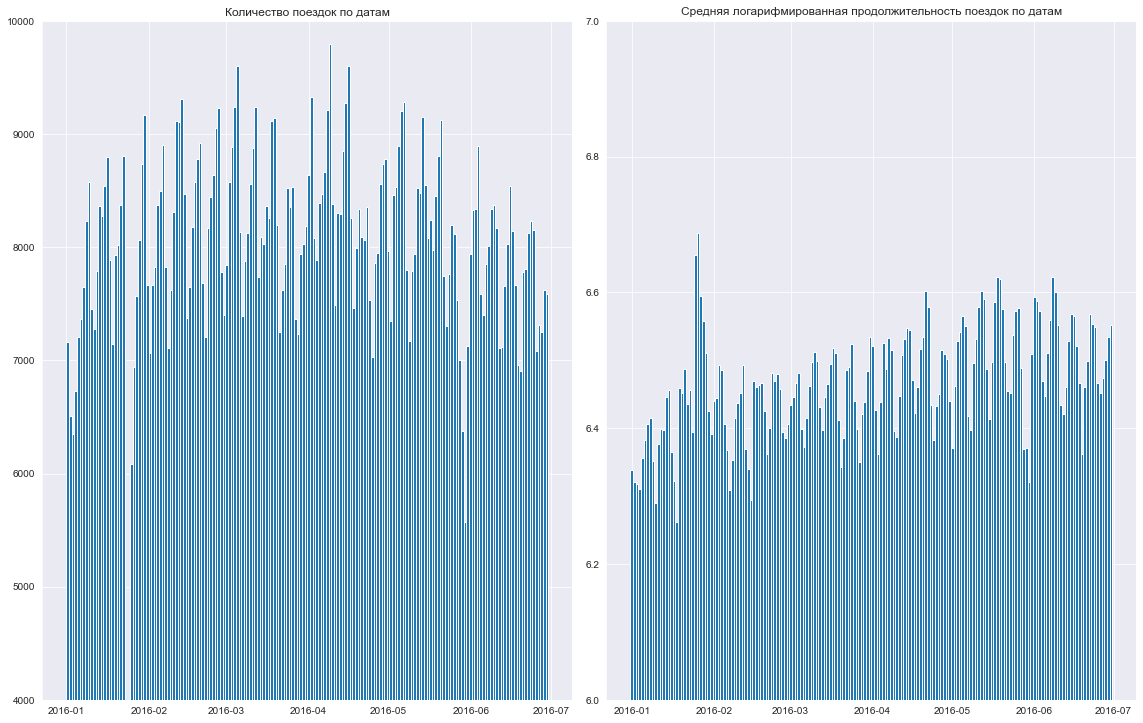

In [277]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [278]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Text(0.5, 1.0, 'Средняя продолжительность поездки vs День недели')

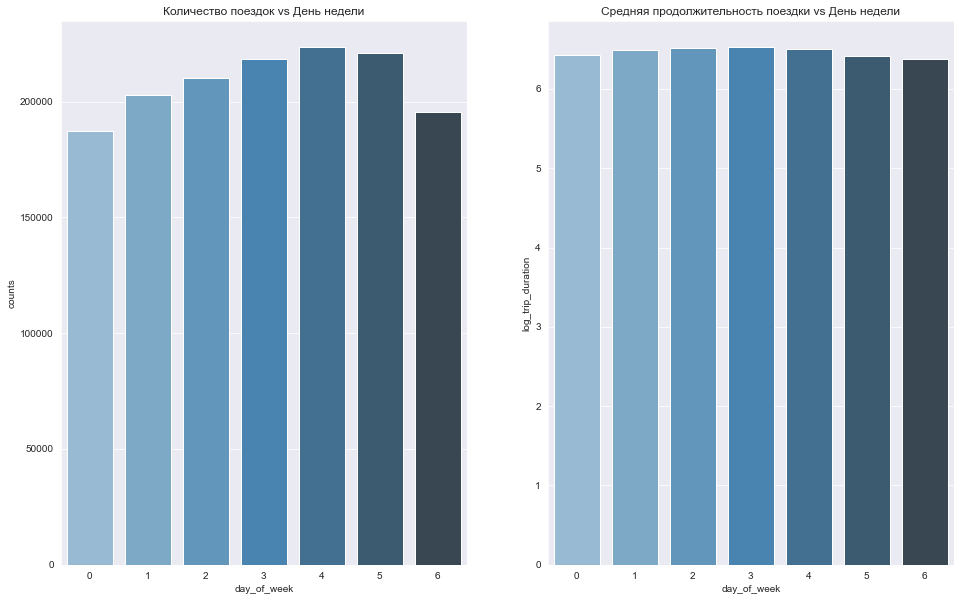

In [279]:
### Your code is here
import seaborn as sns
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 10)


df_day_of_week_count = processed_data.groupby('day_of_week').size().reset_index(name='counts') 
df_day_of_week_mean = processed_data.groupby('day_of_week').agg({"log_trip_duration" : "mean"}).reset_index()

ax_1 = sns.barplot(x="day_of_week", y="counts", data=df_day_of_week_count, palette='Blues_d', ax=axes[0])
ax_2 = sns.barplot(x="day_of_week", y="log_trip_duration", data=df_day_of_week_mean, palette='Blues_d', ax=axes[1])

ax_1.set_title('Количество поездок vs День недели')
ax_2.set_title('Средняя продолжительность поездки vs День недели')

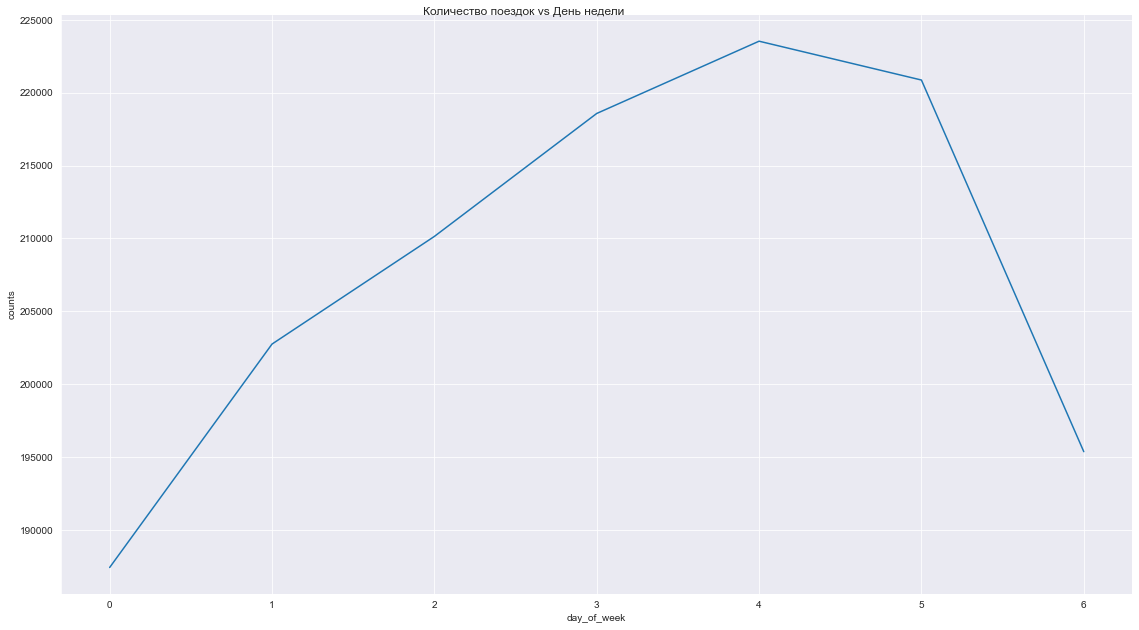

In [280]:
### Your code is here
g = sns.relplot(x="day_of_week", y="counts", data=df_day_of_week_count, palette='Blues_d', kind="line")
g.fig.suptitle("Количество поездок vs День недели")
g.fig.set_size_inches(18,9)

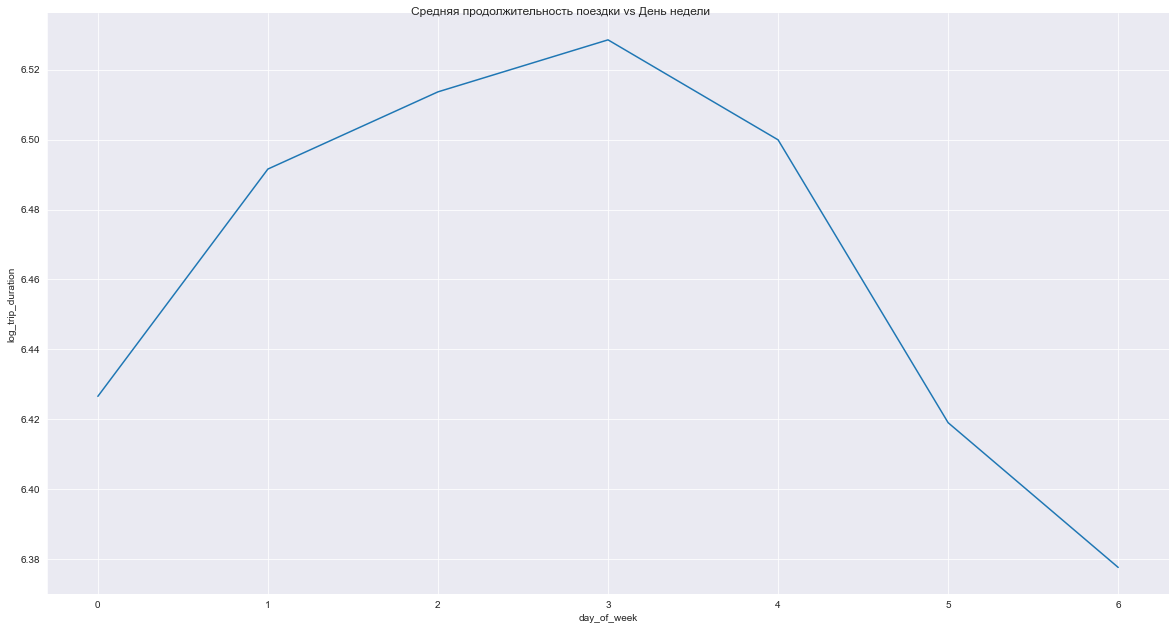

In [281]:
g = sns.relplot(x="day_of_week", y="log_trip_duration", data=df_day_of_week_mean, palette='Blues_d', kind="line")
g.fig.suptitle('Средняя продолжительность поездки vs День недели')
g.fig.set_size_inches(18,9)

Text(0.5, 0.98, 'Средняя продолжительность поездки vs время суток для каждого дня недели')

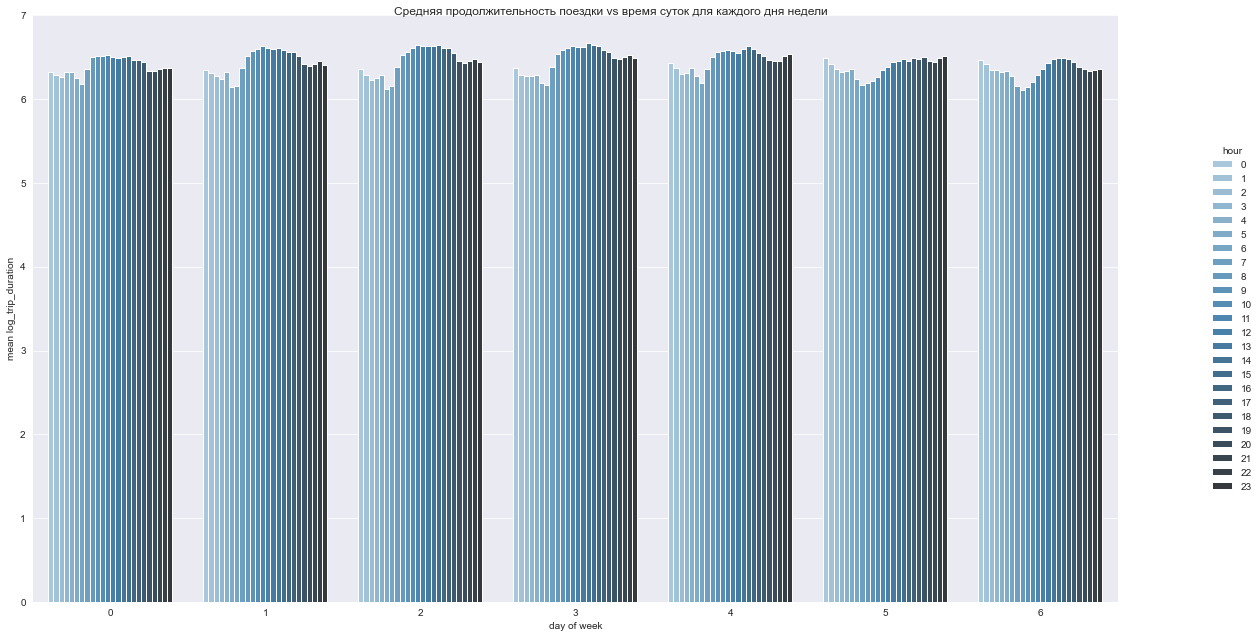

In [282]:
# Draw a nested barplot by species and sex
df_week_day = processed_data.groupby(['day_of_week', 'hour']).agg({"log_trip_duration" : "mean"}).reset_index()
sns.set_style("darkgrid")
g = sns.catplot(
    data=df_week_day, kind="bar",
    x="day_of_week", y="log_trip_duration", hue="hour",
    ci="sd", height=6, palette='Blues_d')
g.fig.set_size_inches(18,9)
g.despine(left=True)
g.set_axis_labels("day of week", "mean log_trip_duration")
g.fig.suptitle("Средняя продолжительность поездки vs время суток для каждого дня недели")

Text(0.5, 0.98, 'Средняя продолжительность поездки vs время суток для каждого дня недели')

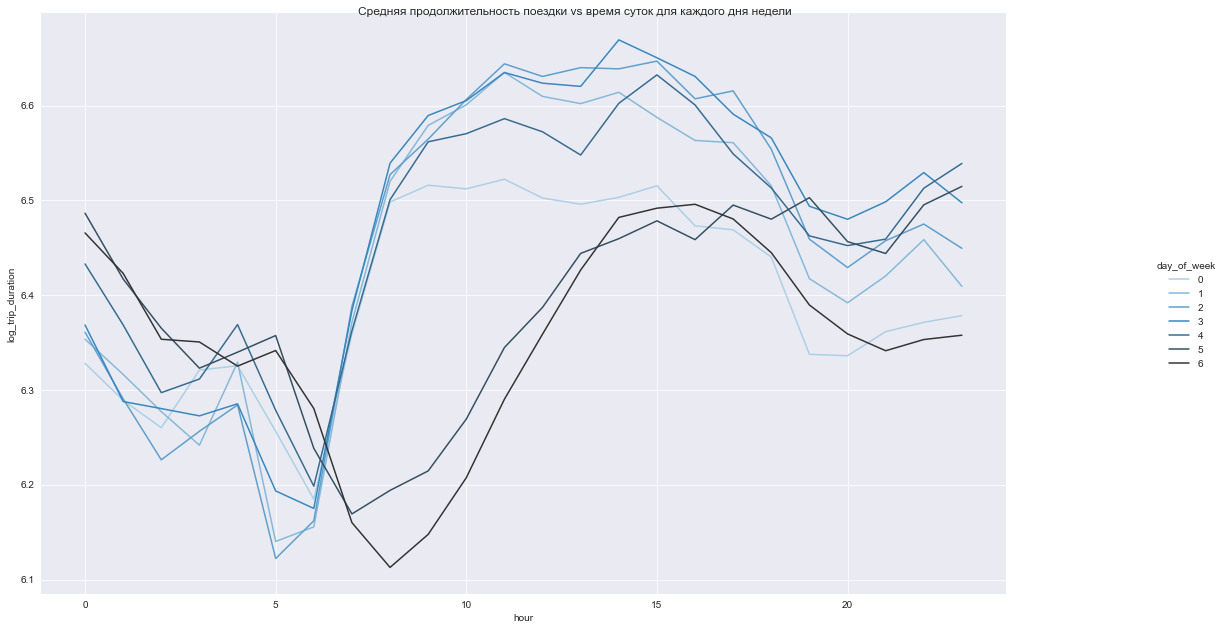

In [283]:
g = sns.relplot(x="hour", y="log_trip_duration",
            hue="day_of_week", palette='Blues_d',
            kind="line", data=df_week_day);
g.fig.set_size_inches(18,9)
g.despine(left=True)
g.fig.suptitle("Средняя продолжительность поездки vs время суток для каждого дня недели")

Text(0.5, 0.98, 'Средняя продолжительность поездки vs Каждого дня недели по месяцам')

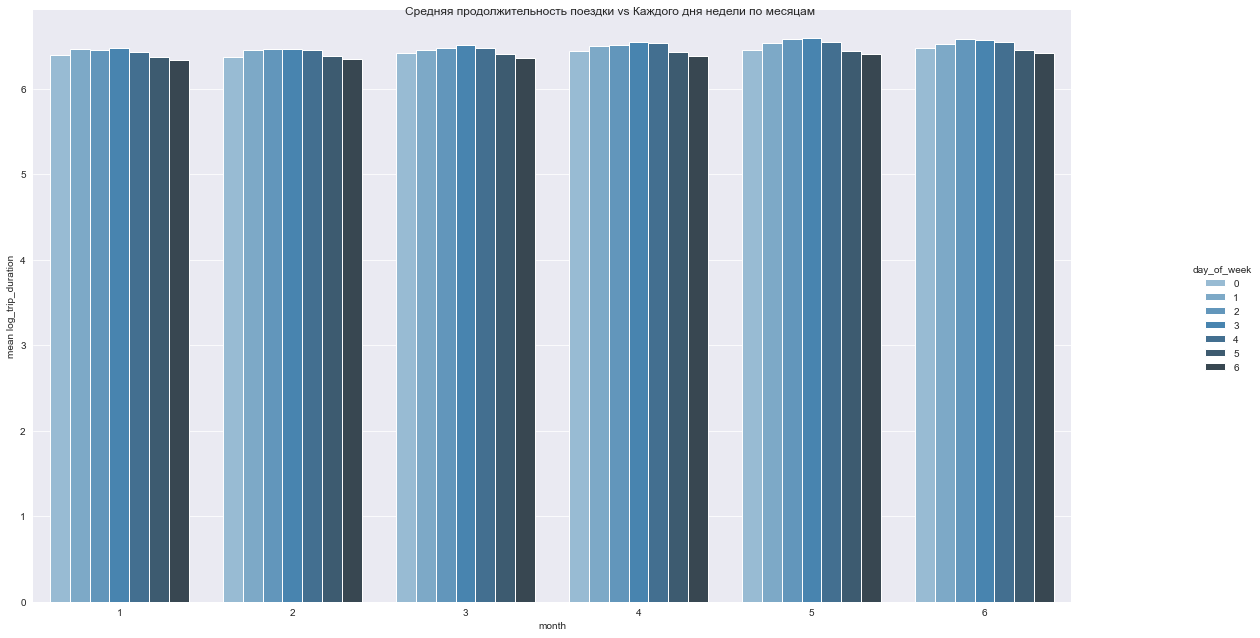

In [284]:
df_month_day = processed_data.groupby(['month', 'day_of_week']).agg({"log_trip_duration" : "mean"}).reset_index()
sns.set_style("darkgrid")
g = sns.catplot(
    data=df_month_day, kind="bar",
    x="month", y="log_trip_duration", hue="day_of_week",
    ci="sd", height=6, palette='Blues_d'
)
g.fig.set_size_inches(18,9)
g.despine(left=True)
g.set_axis_labels("month", "mean log_trip_duration")
g.fig.suptitle("Средняя продолжительность поездки vs Каждого дня недели по месяцам")

Text(0.5, 0.98, 'Средняя продолжительность поездки vs Каждого дня недели по месяцам')

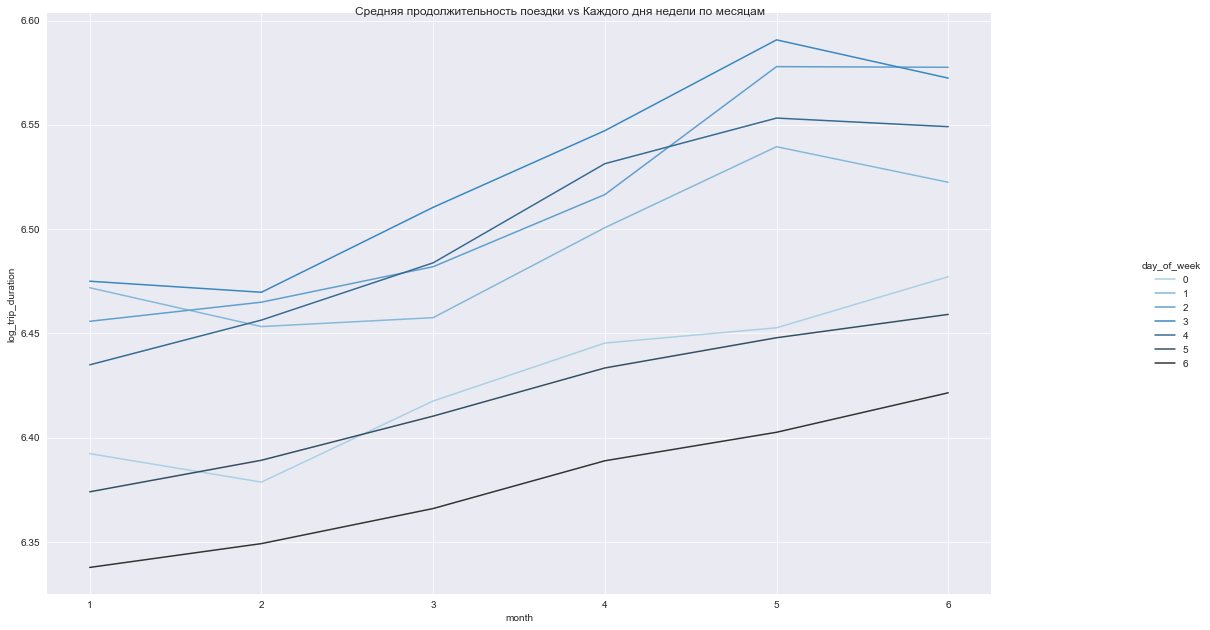

In [285]:
g = sns.relplot(x="month", y="log_trip_duration",
            hue="day_of_week", palette='Blues_d',
            kind="line", data=df_month_day);
g.fig.set_size_inches(18,9)
g.despine(left=True)
g.fig.suptitle("Средняя продолжительность поездки vs Каждого дня недели по месяцам")

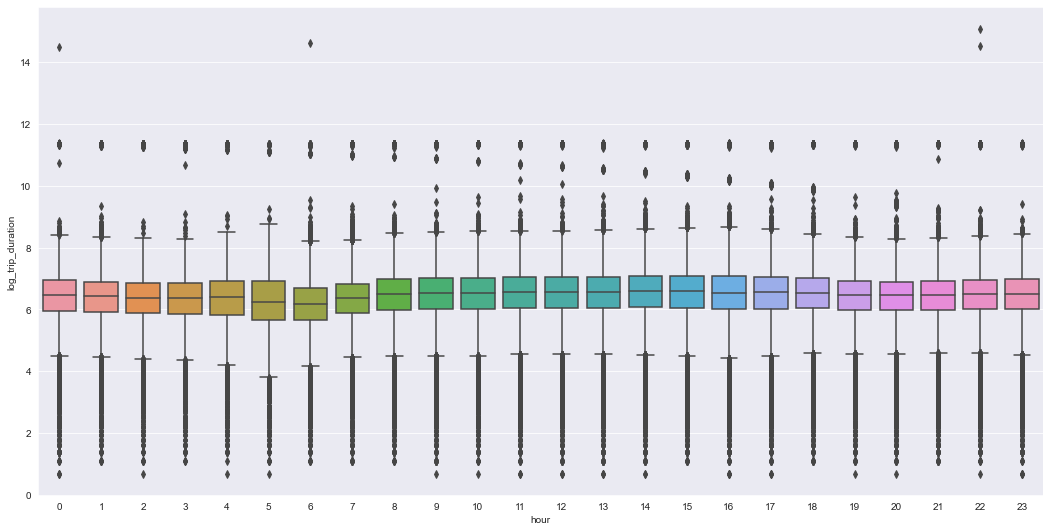

In [286]:
ax = sns.boxplot(x="hour", y="log_trip_duration", data=processed_data)
ax.figure.set_size_inches(18,9)

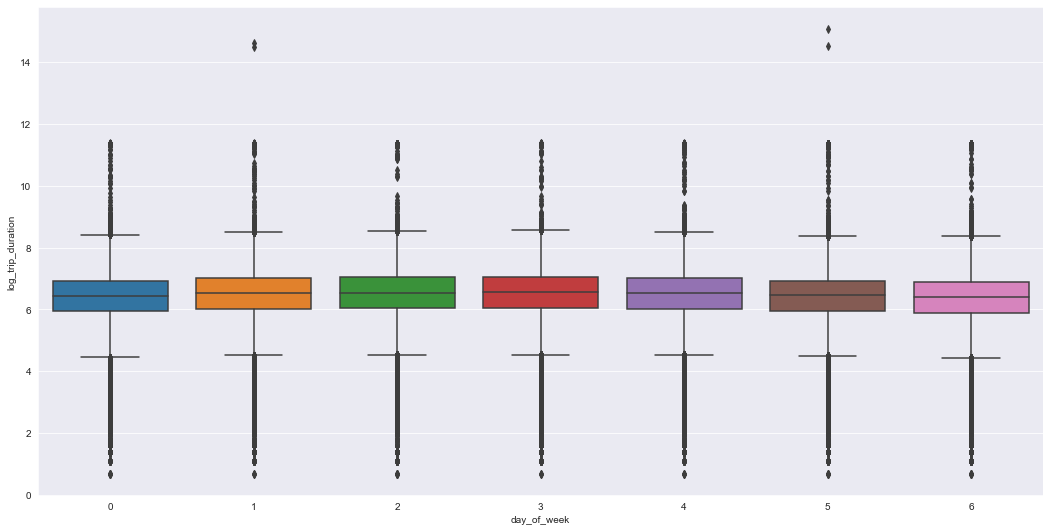

In [287]:
ax = sns.boxplot(x="day_of_week", y="log_trip_duration", data=processed_data)
ax.figure.set_size_inches(18,9)

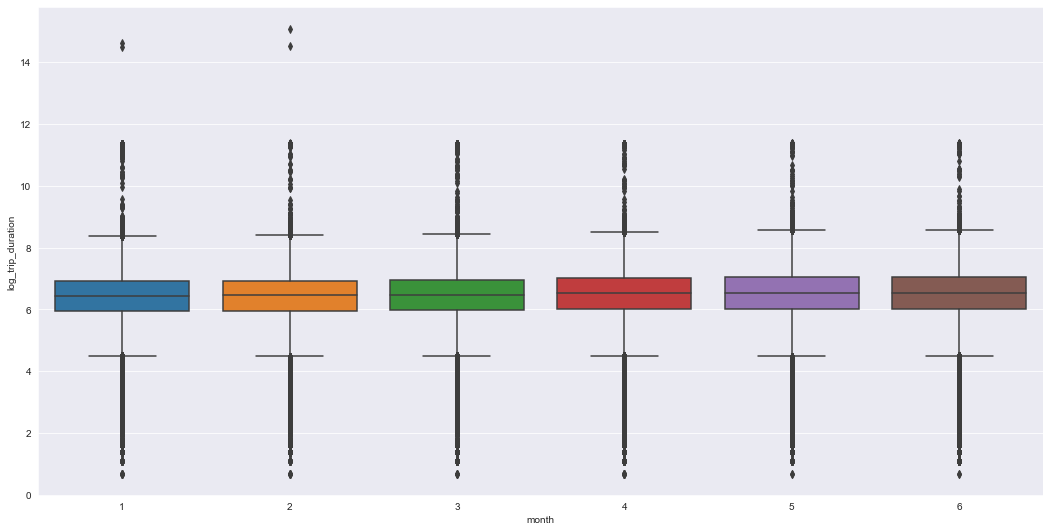

In [288]:
ax = sns.boxplot(x="month", y="log_trip_duration", data=processed_data)
ax.figure.set_size_inches(18,9)

In [289]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Text(0.5, 0.98, 'Корреляция между средним количеством часов между временем суток и днём')

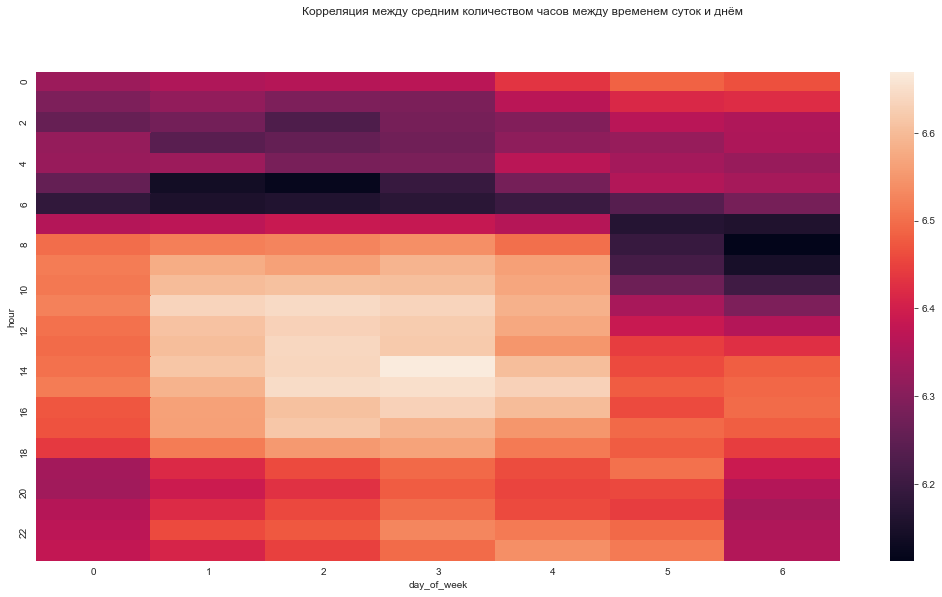

In [290]:
df_group_day_hour = processed_data.groupby(['day_of_week','hour']).agg({'log_trip_duration':'mean'}).reset_index()
df_group_day_hour_pivot = pd.pivot(df_group_day_hour, index='hour', columns='day_of_week', values='log_trip_duration')
ax = sns.heatmap(df_group_day_hour_pivot)
ax.figure.set_size_inches(18,9)
ax.figure.suptitle("Корреляция между средним количеством часов между временем суток и днём")

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [291]:
### Создадим первый бинарный признак
### Your code is here
df_jan = processed_data.query("month == 1")

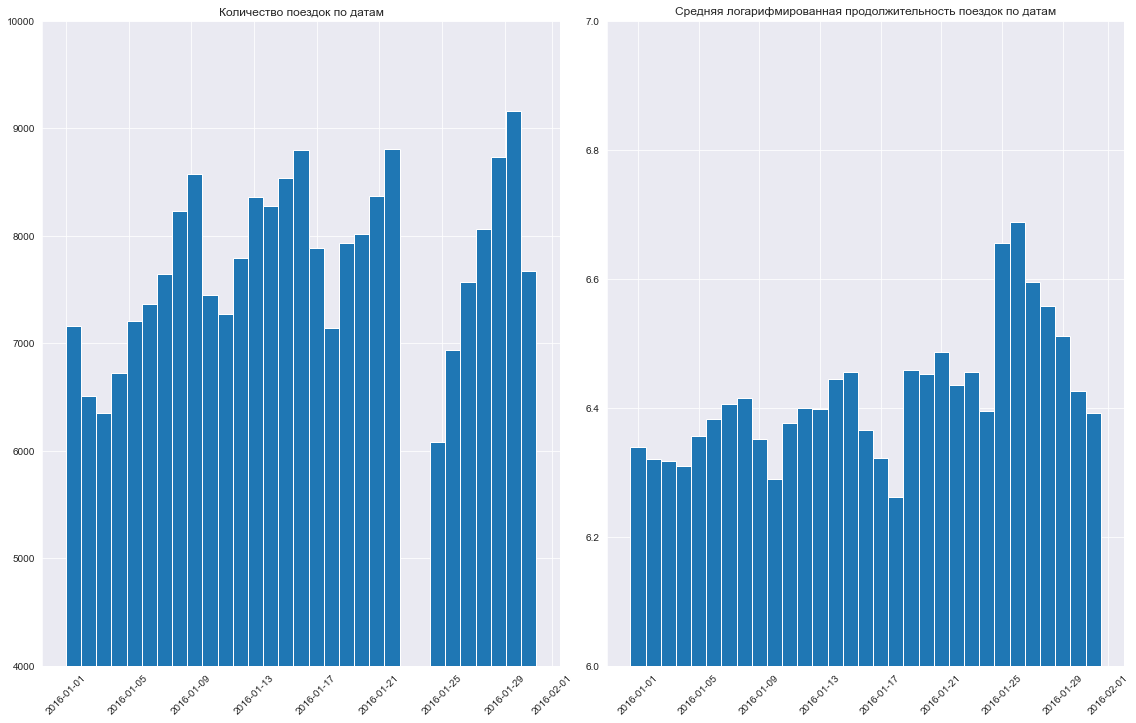

In [292]:
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(df_jan['date'], bins=df_jan.date.unique().shape[0])
plt.ylim((4000, 10000))
plt.xticks(rotation=45)

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(df_jan['date'].unique())), 
        df_jan.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.xticks(rotation=45)

plt.show()

In [293]:
date_anom = df_jan.groupby('date').count().query('vendor_id == 1648').reset_index().date[0]
date_anom

datetime.date(2016, 1, 23)

In [294]:
processed_data['anomaly'] = 0
processed_data.loc[processed_data['date'] == date_anom, 'anomaly'] = 1

In [295]:
### Создадим второй бинарный признак
processed_data['traffic_jam'] = 0

df_group_day_hour = processed_data.groupby(['day_of_week','hour']).agg({'log_trip_duration':'mean'})
for x in df_group_day_hour.sort_values(by=['log_trip_duration'], ascending=False).index[:10]:
    processed_data.loc[(processed_data.day_of_week==x[0]) & (processed_data.hour==x[1]), 'traffic_jam'] = 1

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [296]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [297]:
processed_data[['day_of_week', 'hour', 'month']] = processed_data[['day_of_week', 'hour', 'month']].astype(str)

In [298]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

for col in ['day_of_week', 'hour', 'month']:
    df_ohe = pd.get_dummies(processed_data[[col]], drop_first=True)           
    processed_data = pd.concat([processed_data, df_ohe], axis=1)
processed_data = processed_data.drop(['day_of_week', 'hour', 'month'], axis=1)

In [266]:
df_row_5 = processed_data.iloc[:5]
df_row_5.to_csv('data.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

Text(0, 0.5, 'Количество пассажиров')

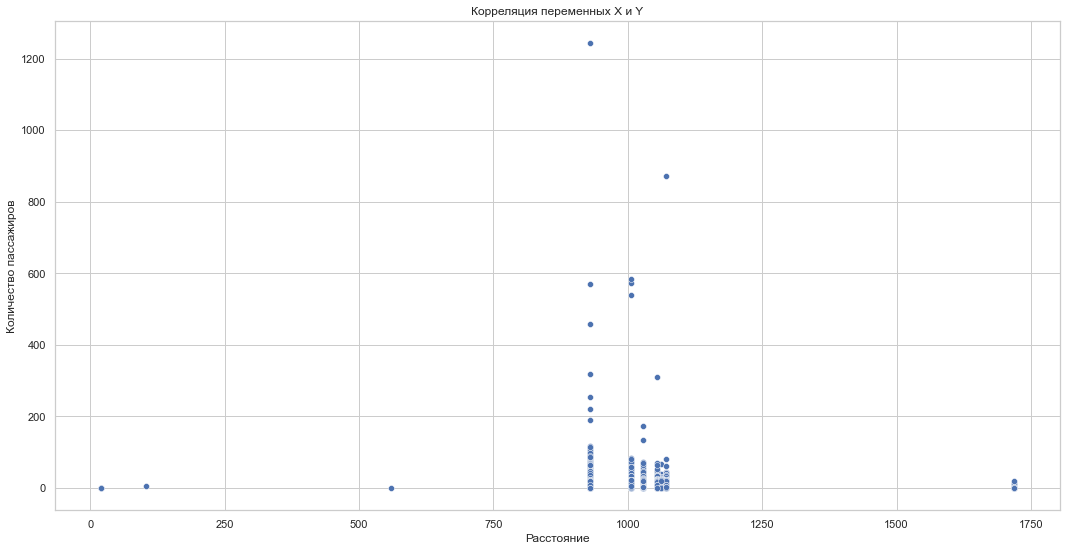

In [318]:
sns.set(style='whitegrid', rc={'figure.figsize' : (18,9)}) 

sns.scatterplot(x = 'passenger_count', y = 'distance_km', data = processed_data)
plt.title('Корреляция переменных X и Y')
plt.xlabel('Расстояние')
plt.ylabel('Количество пассажиров')

In [321]:
x_simple = processed_data['passenger_count']
y_simple = processed_data['distance_km']
my_rho = np.corrcoef(x_simple, y_simple)
my_rho

array([[1.        , 0.01659589],
       [0.01659589, 1.        ]])

In [322]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_5,hour_6,hour_7,hour_8,hour_9,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [326]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X, y = processed_data.drop('log_trip_duration', axis=1), processed_data['log_trip_duration']

(1458644, 40)

In [327]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [344]:
sfs_cols = sfs.get_feature_names_out()

In [345]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

from sklearn.model_selection import train_test_split

model.fit(X[sfs_cols], y)

LinearRegression()

In [347]:
np.mean((model.predict(X[sfs_cols]) - y)**2)

0.4154000234078043